In [8]:
import pandas as pd 
import os 
import sys
import plotly.offline as pyo
import plotly.graph_objs as go
from PIL import Image

# Set notebook mode to work in offline
pyo.init_notebook_mode()

sys.path.insert(0, os.getcwd())
sys.path.insert(0, os.getcwd() + '/code')
from feature import *
from helper_functions import *
from viz import *

In [2]:
df_play = pd.read_csv("data/plays.csv")
df_area = pd.read_csv("data/Area_features.csv")
df_area_play = df_area.merge(df_play, how='left', on = ['gameId', 'playId'])

df_week = pd.read_csv("data/week1.csv")
# Enlève les playActions
df_area_play = df_area_play[df_area_play.pff_playAction == False]

df_sack = df_play[df_play.passResult == 'S']

# Calcul de l'espérance de vie de la poche
Acrit = 11.2
df_area_play.loc[:, 'PocketLifeTime'] = 1/10 * ((Acrit - df_area_play.Ae)/(df_area_play.Ac - df_area_play.Ae) * (df_area_play.tc - df_area_play.te) + df_area_play.te)
df_area_play.loc[:, 'Speed'] = (df_area_play.Ac - df_area_play.Ae) / (df_area_play.tc - df_area_play.te) 


In [3]:
metric = 'PocketLifeTime'
linemen = 'possessionTeam' # defensiveTeam # possessionTeam

team_ranking = df_area_play.groupby(linemen).median().reset_index()
team_ranking = team_ranking.sort_values(by = metric)
fig = go.Figure(
    go.Bar(
        x = team_ranking[metric].rank(method = 'first'),
        y = team_ranking[metric],
        marker_color = [colors_teams[team] for team in team_ranking[linemen]],
        text = team_ranking[linemen],
        textfont = dict(size = 10, color = 'white')
    )
)
fig.update_layout(
            barmode='group',
            template="plotly_white",
)
fig.update_yaxes(
    title= dict(
        text ="Pocket Life Time (s)",
    ),
    range=[min(0, team_ranking[metric].min()), team_ranking[metric].max() * 1.2],
)
fig.update_xaxes(
    title= dict(
        text ="Team rank",
    ),
    tick0 = 1,
    dtick = 1,
)

for n, team in enumerate(team_ranking[linemen].values): 
    fig.add_layout_image(
            dict(
                source=Image.open(f"data/logos-nfl/{team}.png"),
                xref="x",
                yref="y",
                x = team_ranking[metric].rank(method = 'first').iloc[n],
                y = team_ranking[metric].iloc[n] * 1.05,
                sizex= team_ranking[metric].max() - team_ranking[metric].min(),
                sizey=team_ranking[metric].max() - team_ranking[metric].min(),
                xanchor="center",
                yanchor="bottom"
                #sizing="stretch",
                #layer="below"
                )
    )
fig

In [18]:
metric = 'passResult'
linemen = 'defensiveTeam'
df_sack = df_play[df_play.passResult == 'S']
ids_match = pd.read_csv('xPL.csv').gameId.unique()
df_sack = df_sack[df_sack.gameId.isin(ids_match)]

team_ranking = df_sack.groupby(linemen).count().reset_index()
team_ranking = team_ranking.sort_values(by = metric)
fig = go.Figure(
    go.Bar(
        x = team_ranking[metric].rank(method = 'first'),
        y = team_ranking[metric],
        marker_color = [colors_teams[team] for team in team_ranking[linemen]],
        text = team_ranking[linemen],
        textfont = dict(size = 10, color = 'white')
    )
)
fig.update_layout(
            barmode='group',
            template="plotly_white",
)
fig.update_yaxes(
    title= dict(
        text ="Nombre de sacks",
    )
)
fig.update_xaxes(
    title= dict(
        text ="Team rank",
    ),
    tick0 = 1,
    dtick = 1,
)

fig

In [5]:
metric_x = 'PocketLifeTime'
metric_y = 'Ac'
linemen = 'defensiveTeam' # defensiveTeam # possessionTeam

team_ranking = df_area_play.groupby(linemen).median().reset_index()
fig = go.Figure(
    go.Scatter(
        x = team_ranking[metric_x],
        y = team_ranking[metric_y],
        mode='markers',
        marker_color = [colors_teams[team] for team in team_ranking[linemen]],
        text = team_ranking[linemen],
        opacity = 0,
        hovertemplate = "%{text}: <br>" + metric_x + ": %{x} <br>" + metric_y + ": %{y}"
    )
)
fig.update_layout(
            barmode='group',
            template="plotly_white",
)
fig.update_yaxes(
    title= dict(
        text = metric_y,
    ),
    #range=[min(0, team_ranking[metric].min()), team_ranking[metric].max() * 1.2],
)
fig.update_xaxes(
    title= dict(
        text = metric_x,
    ),
    tick0 = 1,
    dtick = 1,
)

for n, team in enumerate(team_ranking[linemen].values): 
    fig.add_layout_image(
            dict(
                source=Image.open(f"data/logos-nfl/{team}.png"),
                xref="x",
                yref="y",
                x = team_ranking[metric_x].iloc[n],
                y = team_ranking[metric_y].iloc[n],
                sizex= (team_ranking[metric_x].max() - team_ranking[metric_x].min()) / 7,
                sizey= (team_ranking[metric_y].max() - team_ranking[metric_y].min()) / 7,
                xanchor="center",
                yanchor="middle",
                opacity = 0.8
                #sizing="stretch",
                #layer="below"
                )
    )
fig

In [14]:
df_xPL = pd.read_csv('xPL.csv')
df_xPL = df_xPL.merge(df_play, on = ['playId', 'gameId'])
df_xPL.loc[:, 'Won Time'] = df_xPL.apply(lambda x: min(x.t_med - x.duration, 0) if x.dropBackType == 'TRADITIONAL' else x.t_med - x.duration, axis = 1) / 10
#df_xPL


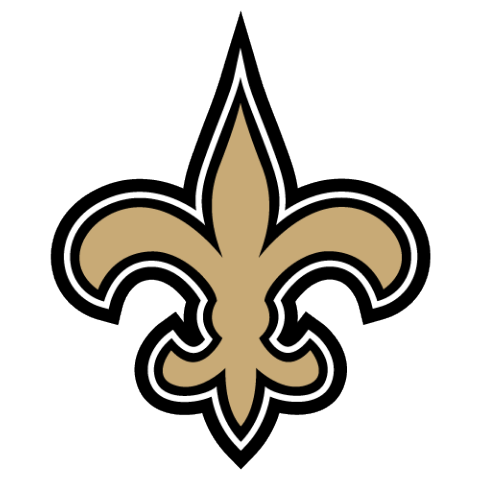
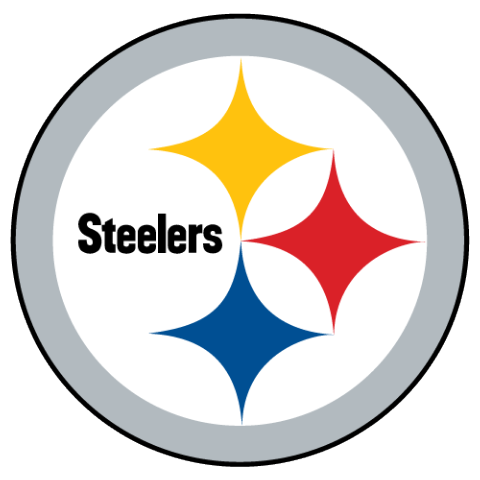
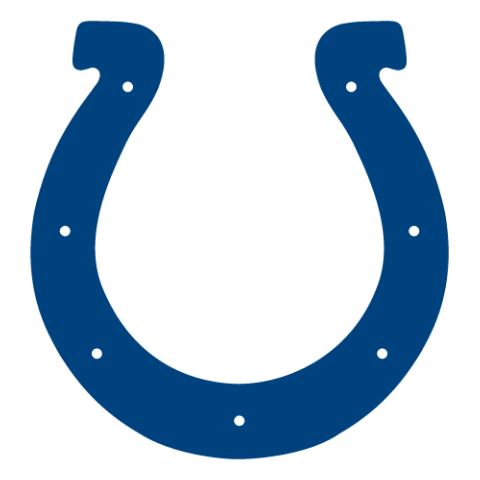
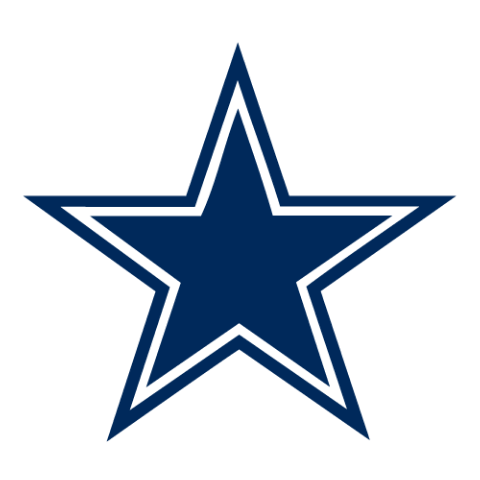
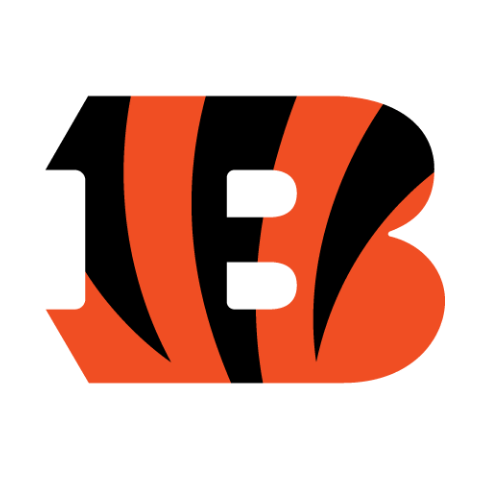
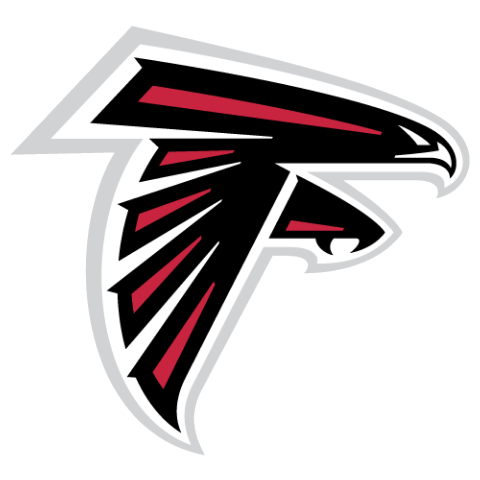
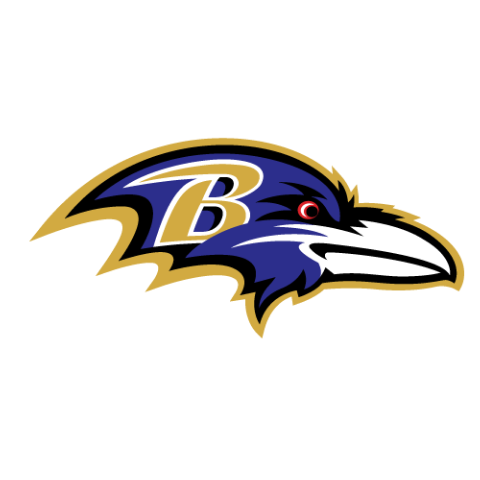
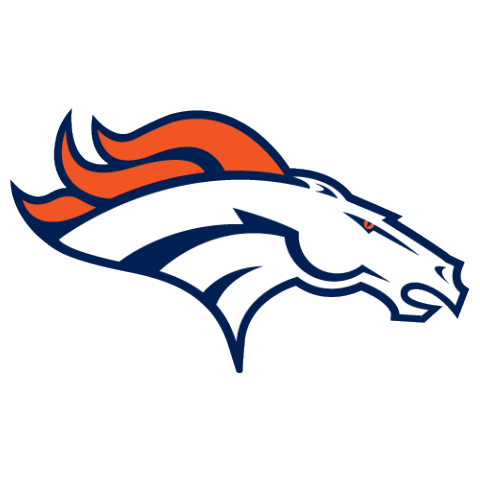
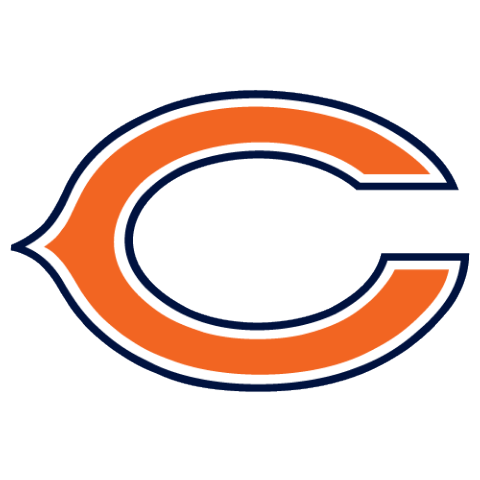
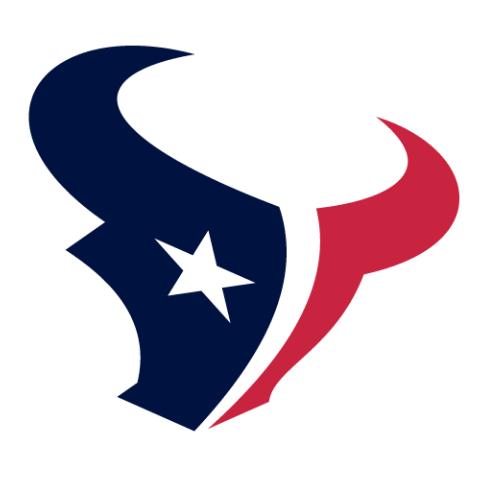
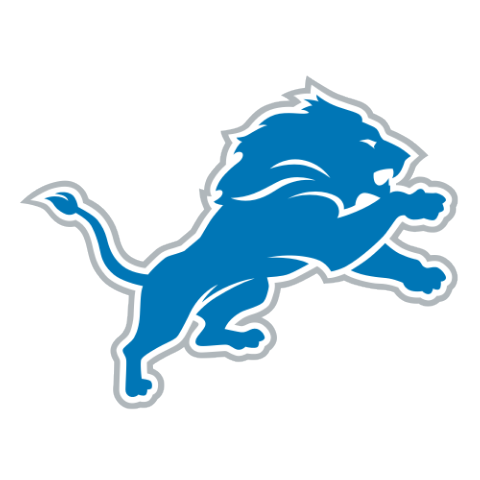
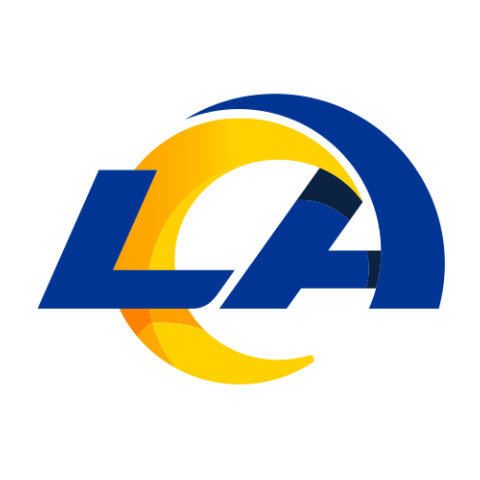
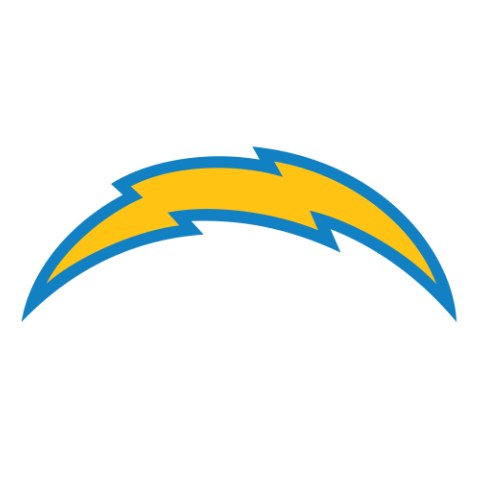
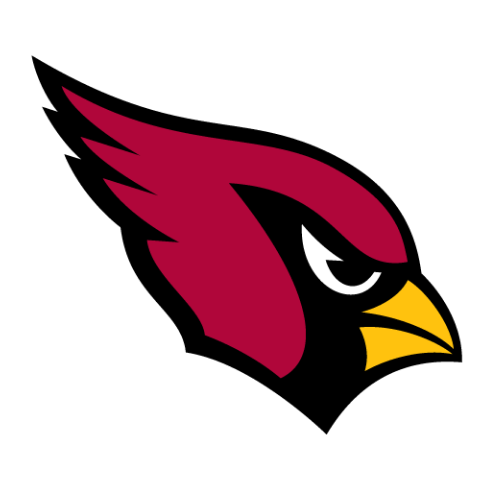
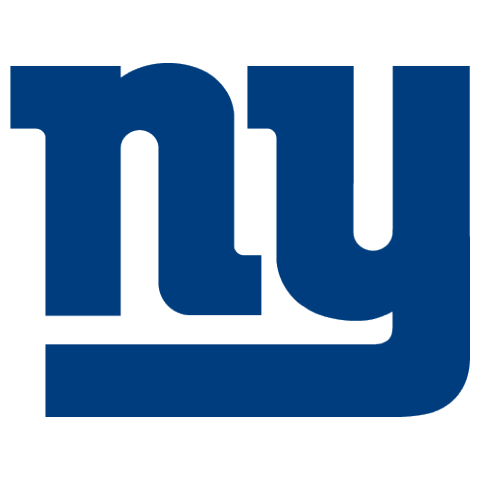
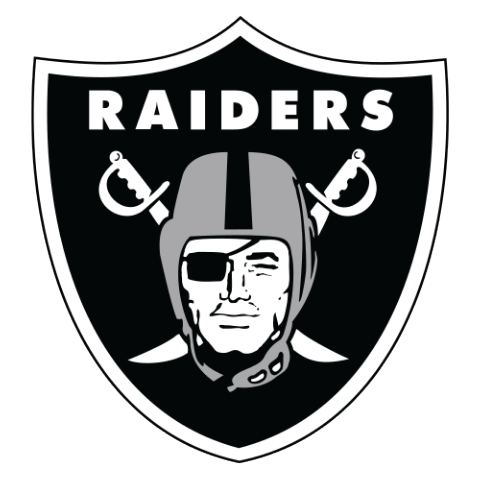
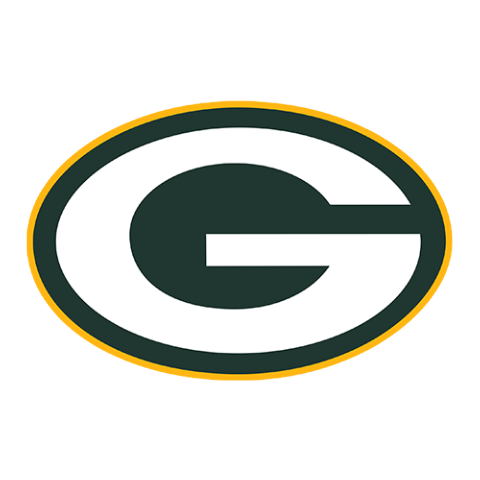
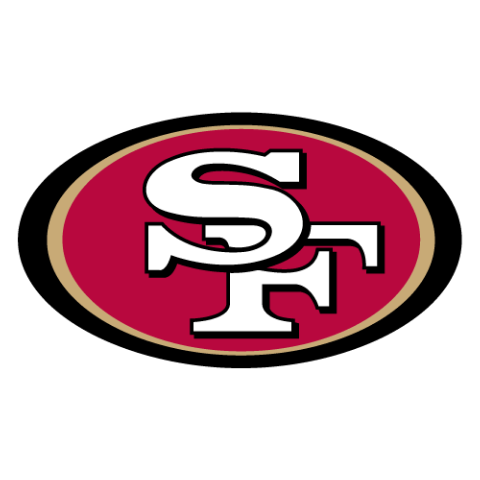
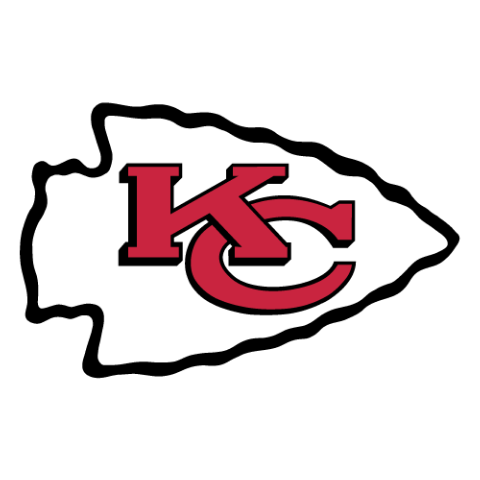
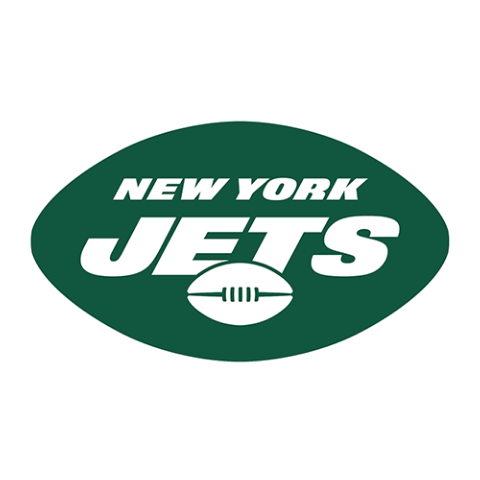
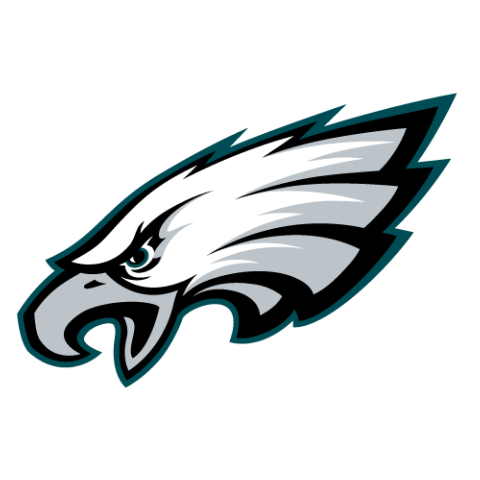
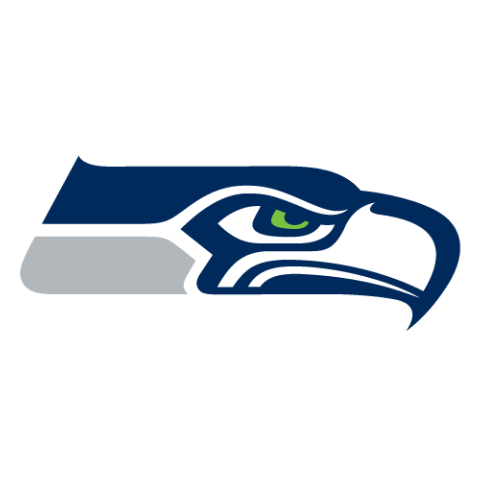
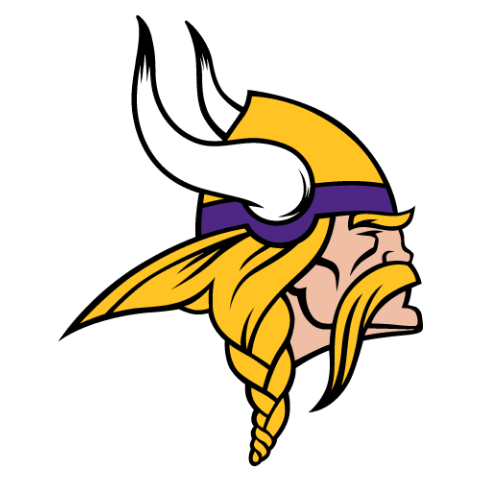
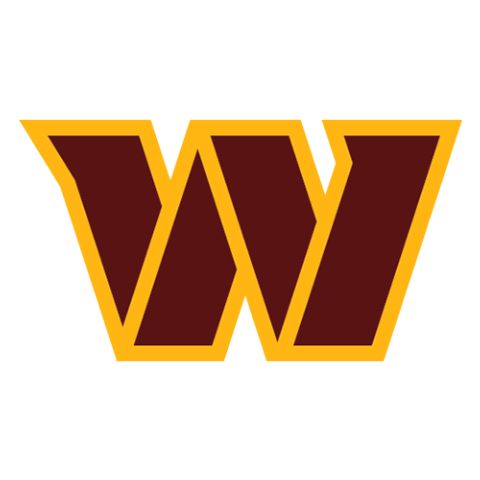
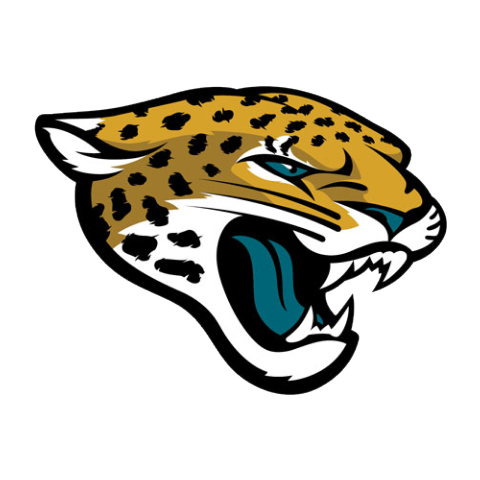
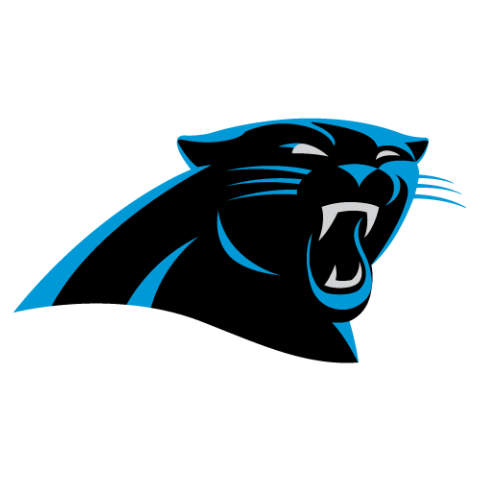
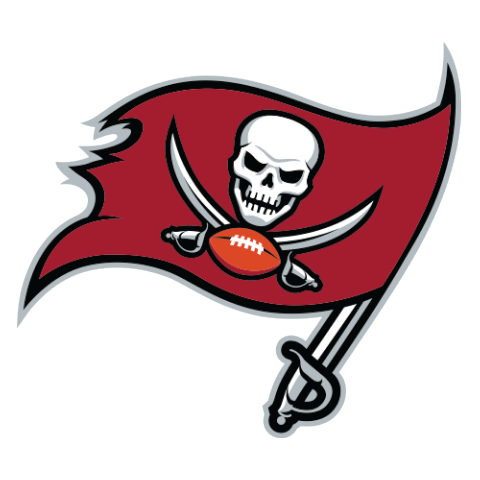
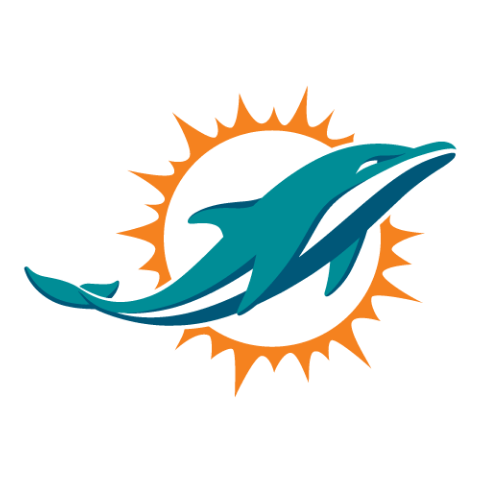
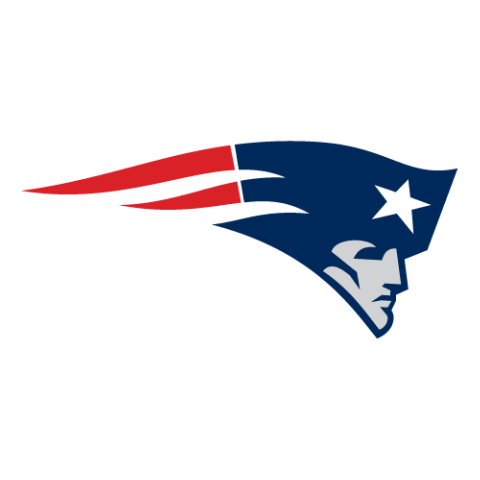
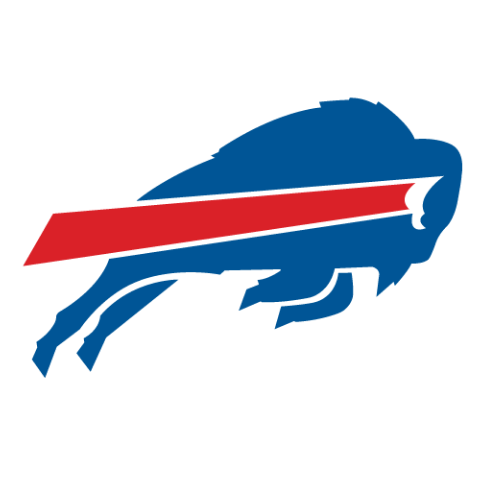
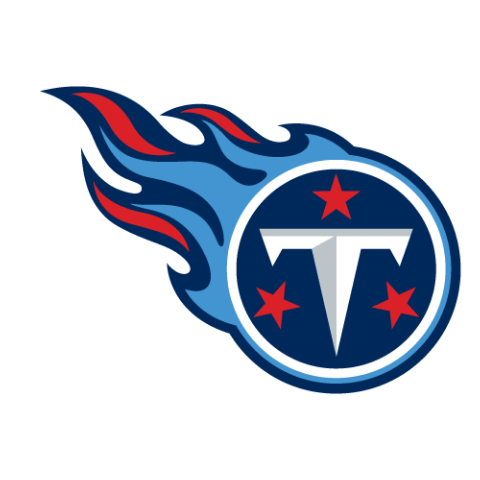
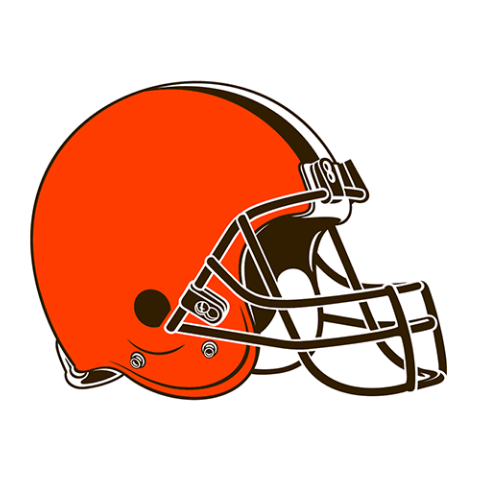

In [17]:
metric = 'Won Time'
linemen = 'defensiveTeam' # defensiveTeam # possessionTeam

team_ranking = df_xPL.groupby(linemen).sum().reset_index()
team_ranking = team_ranking.sort_values(by = metric)
fig = go.Figure(
    go.Bar(
        x = team_ranking[metric].rank(method = 'first'),
        y = team_ranking[metric],
        marker_color = [colors_teams[team] for team in team_ranking[linemen]],
        text = team_ranking[linemen],
        textfont = dict(size = 10, color = 'white')
    )
)
fig.update_layout(
            barmode='group',
            template="plotly_white",
)
fig.update_yaxes(
    title= dict(
        text ="Temps gagné par les linemens",
    ),
    range=[min(0, team_ranking[metric].min())*1.5, team_ranking[metric].max() * 1.5],
)
fig.update_xaxes(
    title= dict(
        text ="Team rank",
    ),
    tick0 = 1,
    dtick = 1,
)

for n, team in enumerate(team_ranking[linemen].values): 
    fig.add_layout_image(
            dict(
                source=Image.open(f"data/logos-nfl/{team}.png"),
                xref="x",
                yref="y",
                x = team_ranking[metric].rank(method = 'first').iloc[n],
                y = team_ranking[metric].iloc[n] * 1.05,
                sizex= (team_ranking[metric].max() - team_ranking[metric].min()) / 6,
                sizey= (team_ranking[metric].max() - team_ranking[metric].min()) / 6,
                xanchor="center",
                yanchor="bottom" if team_ranking[metric].iloc[n] > 0 else "top"
                #sizing="stretch",
                #layer="below"
                )
    )
fig